In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# 그래프 한글 깨짐 방지
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

from sklearn.model_selection import train_test_split
# AUTO ML
from supervised.automl import AutoML

In [3]:
# 데이터 불러오기
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
# train 데이터 보기
train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,2022-09-11 새순,2022-09-12 새순,2022-09-13 새순,2022-09-14 새순,2022-09-15 새순,2022-09-16 새순,2022-09-17 새순,2022-09-18 새순,2022-09-19 새순,2022-09-20 새순,2022-09-21 새순,2022-09-22 새순,2022-09-23 새순,2022-09-24 새순,2022-09-25 새순,2022-09-26 새순,2022-09-27 새순,2022-09-28 새순,2022-09-29 새순,2022-09-30 새순,2022-10-01 새순,2022-10-02 새순,2022-10-03 새순,2022-10-04 새순,2022-10-05 새순,2022-10-06 새순,2022-10-07 새순,2022-10-08 새순,2022-10-09 새순,2022-10-10 새순,2022-10-11 새순,2022-10-12 새순,2022-10-13 새순,2022-10-14 새순,2022-10-15 새순,2022-10-16 새순,2022-10-17 새순,2022-10-18 새순,2022-10-19 새순,2022-10-20 새순,2022-10-21 새순,2022-10-22 새순,2022-10-23 새순,2022-10-24 새순,...,2022-09-30 엽록소,2022-10-01 엽록소,2022-10-02 엽록소,2022-10-03 엽록소,2022-10-04 엽록소,2022-10-05 엽록소,2022-10-06 엽록소,2022-10-07 엽록소,2022-10-08 엽록소,2022-10-09 엽록소,2022-10-10 엽록소,2022-10-11 엽록소,2022-10-12 엽록소,2022-10-13 엽록소,2022-10-14 엽록소,2022-10-15 엽록소,2022-10-16 엽록소,2022-10-17 엽록소,2022-10-18 엽록소,2022-10-19 엽록소,2022-10-20 엽록소,2022-10-21 엽록소,2022-10-22 엽록소,2022-10-23 엽록소,2022-10-24 엽록소,2022-10-25 엽록소,2022-10-26 엽록소,2022-10-27 엽록소,2022-10-28 엽록소,2022-10-29 엽록소,2022-10-30 엽록소,2022-10-31 엽록소,2022-11-01 엽록소,2022-11-02 엽록소,2022-11-03 엽록소,2022-11-04 엽록소,2022-11-05 엽록소,2022-11-06 엽록소,2022-11-07 엽록소,2022-11-08 엽록소,2022-11-09 엽록소,2022-11-10 엽록소,2022-11-11 엽록소,2022-11-12 엽록소,2022-11-13 엽록소,2022-11-14 엽록소,2022-11-15 엽록소,2022-11-16 엽록소,2022-11-17 엽록소,2022-11-18 엽록소,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,2.5,2.5,2.5,2.5,2.4,2.4,2.4,2.4,2.3,2.3,2.3,2.3,2.2,2.2,2.2,2.2,2.1,2.1,2.1,2.1,2.0,2.0,2.0,2.0,1.9,1.9,1.9,1.9,1.8,1.8,1.8,1.8,1.7,1.7,1.7,1.7,1.6,1.6,1.6,1.6,1.5,1.5,1.5,1.5,...,75.427005,75.266187,75.226094,75.162319,75.079444,75.013855,74.935697,74.842749,74.836657,74.816928,74.788574,74.690358,74.504942,74.394908,74.351704,74.166346,74.020254,73.835142,73.766164,73.755269,73.627395,73.465457,73.395076,73.311405,73.243028,73.087409,73.081651,73.023755,72.987263,72.977606,72.838462,72.645386,72.512869,72.445908,72.370097,72.301180,72.228374,72.207746,72.068354,71.987663,71.869466,71.852923,71.690854,71.576402,71.384018,71.301893,71.234817,71.076903,70.996113,70.985843,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.5,2.5,2.5,2.4,2.4,2.4,2.3,2.3,2.3,2.2,2.2,2.2,2.1,2.1,2.1,2.0,2.0,2.0,1.9,1.9,1.9,1.8,1.8,1.8,1.7,1.7,1.7,1.6,1.6,...,76.572528,76.478269,76.328153,76.276879,76.092349,75.915247,75.760830,75.591943,75.431225,75.244795,75.119250,74.997296,74.880196,74.750138,74.603761,74.524808,74.351383,74.272749,74.138010,74.052790,74.008452,73.826668,73.685576,73.668765,73.542308,73.530723,73.523570,73.507814,73.470401,73.373457,73.248743,73.226885,73.183666,73.156484,73.072504,72.909826,72.880429,72.775387,72.624061,72.561918,72.437466,72.274675,72.145225,71.970863,71.955864,71.866504,71.678098,71.653838,71.593234,71.551460,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,2.7,2.7,2.7,2.6,2.6,2.6,2.6,2.5,2.5,2.5,2.5,2.4,2.4,2.4,2.3,2.3,2.3,2.3,2.2,2.2,2.2,2.2,2.1,2.1,2.1,2.0,2.0,2.0,2.0,1.9,1.9,1.9,1.8,1.8,1.8,1.8,1.7,1.7,1.7,1.6,1.6,1.6,1.6,1.5,1.5,...,75.883333,75.793009,75.710249,75.700536,75.566008,75.527445,75.511756,75.505379,75.389740,75.316041,75.135268,75.092589,75.015003,74.942818,74.847217,74.738796,74.625453,74.511175,74.419760,74.379167,74.312690,74.160403,74.133141,74.006668,73.940456,73.920831,73.810195,73.670367,73.656417,73.525656,73.508678,73

In [5]:
# test 데이터 보기
test.head()

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,2022-09-11 새순,2022-09-12 새순,2022-09-13 새순,2022-09-14 새순,2022-09-15 새순,2022-09-16 새순,2022-09-17 새순,2022-09-18 새순,2022-09-19 새순,2022-09-20 새순,2022-09-21 새순,2022-09-22 새순,2022-09-23 새순,2022-09-24 새순,2022-09-25 새순,2022-09-26 새순,2022-09-27 새순,2022-09-28 새순,2022-09-29 새순,2022-09-30 새순,2022-10-01 새순,2022-10-02 새순,2022-10-03 새순,2022-10-04 새순,2022-10-05 새순,2022-10-06 새순,2022-10-07 새순,2022-10-08 새순,2022-10-09 새순,2022-10-10 새순,2022-10-11 새순,2022-10-12 새순,2022-10-13 새순,2022-10-14 새순,2022-10-15 새순,2022-10-16 새순,2022-10-17 새순,2022-10-18 새순,2022-10-19 새순,2022-10-20 새순,2022-10-21 새순,2022-10-22 새순,2022-10-23 새순,2022-10-24 새순,2022-10-25 새순,...,2022-09-30 엽록소,2022-10-01 엽록소,2022-10-02 엽록소,2022-10-03 엽록소,2022-10-04 엽록소,2022-10-05 엽록소,2022-10-06 엽록소,2022-10-07 엽록소,2022-10-08 엽록소,2022-10-09 엽록소,2022-10-10 엽록소,2022-10-11 엽록소,2022-10-12 엽록소,2022-10-13 엽록소,2022-10-14 엽록소,2022-10-15 엽록소,2022-10-16 엽록소,2022-10-17 엽록소,2022-10-18 엽록소,2022-10-19 엽록소,2022-10-20 엽록소,2022-10-21 엽록소,2022-10-22 엽록소,2022-10-23 엽록소,2022-10-24 엽록소,2022-10-25 엽록소,2022-10-26 엽록소,2022-10-27 엽록소,2022-10-28 엽록소,2022-10-29 엽록소,2022-10-30 엽록소,2022-10-31 엽록소,2022-11-01 엽록소,2022-11-02 엽록소,2022-11-03 엽록소,2022-11-04 엽록소,2022-11-05 엽록소,2022-11-06 엽록소,2022-11-07 엽록소,2022-11-08 엽록소,2022-11-09 엽록소,2022-11-10 엽록소,2022-11-11 엽록소,2022-11-12 엽록소,2022-11-13 엽록소,2022-11-14 엽록소,2022-11-15 엽록소,2022-11-16 엽록소,2022-11-17 엽록소,2022-11-18 엽록소,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,4.1,4.0,4.0,3.9,3.9,3.8,3.8,3.7,3.7,3.6,3.6,3.5,3.5,3.5,3.4,3.4,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,3.0,2.9,2.9,2.8,2.8,2.8,2.7,2.7,2.6,2.6,2.5,2.5,2.5,2.4,2.4,2.3,2.3,2.3,2.2,2.2,2.1,2.1,2.0,2.0,2.0,1.9,...,77.562211,77.556393,77.491610,77.462227,77.347296,77.282410,77.193844,77.051414,76.909094,76.854623,76.793634,76.660647,76.464527,76.310109,76.144155,76.033916,75.949211,75.873663,75.749145,75.579353,75.529159,75.386039,75.229657,75.065886,74.868571,74.757658,74.671614,74.521238,74.416054,74.297343,74.108026,74.020540,73.923707,73.903627,73.801957,73.730936,73.646378,73.563641,73.437864,73.248723,73.187633,73.183802,73.079103,72.983074,72.910430,72.729935,72.728706,72.654241,72.473842,72.286599,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,2.4,2.4,2.4,2.4,2.4,2.3,2.3,2.3,2.3,2.2,2.2,2.2,2.2,2.2,2.1,2.1,2.1,2.0,2.0,2.0,2.0,2.0,1.9,1.9,1.9,1.9,1.8,1.8,1.8,1.8,1.8,1.7,1.7,1.7,1.7,1.6,1.6,1.6,1.6,1.6,1.5,1.5,1.5,1.5,1.4,1.4,1.4,1.4,1.4,1.4,...,72.646031,72.573707,72.527968,72.481620,72.295719,72.248455,72.195989,72.154525,72.002974,71.886738,71.886448,71.867618,71.857347,71.849722,71.702246,71.677419,71.626906,71.569726,71.558584,71.387212,71.346400,71.326040,71.308367,71.140593,71.018544,70.843839,70.725494,70.540663,70.420182,70.326784,70.158016,70.093389,70.036411,69.947785,69.827298,69.725429,69.687467,69.542796,69.381261,69.366878,69.181029,69.101366,69.031571,68.927159,68.914028,68.848637,68.794057,68.672182,68.597961,68.539124,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,4.5,4.4,4.4,4.3,4.3,4.2,4.2,4.1,4.1,4.0,4.0,3.9,3.9,3.8,3.8,3.7,3.7,3.6,3.6,3.5,3.5,3.5,3.4,3.4,3.3,3.3,3.2,3.2,3.1,3.1,3.0,3.0,2.9,2.9,2.9,2.8,2.8,2.7,2.7,2.6,2.6,2.5,2.5,2.4,2.3,2.3,2.2,2.2,2.1,2.1,...,79.284895,79.199715,79.048392,78.884828,78.765226,78.719107,78.550353,78.507881,78.347106,78.212862,78.042765,77.998055,77.802849,77.730328,77.654040,77.590035,77.578792,77.394905,77.268172,77.116234,77.105633,77.013866,77.004886,76.978108,76.798795,76.768166,76.755840,76.691228,76.492071,76.463068,76.422402,

<AxesSubplot:title={'center':'착과량(int)과의 상관관계'}>

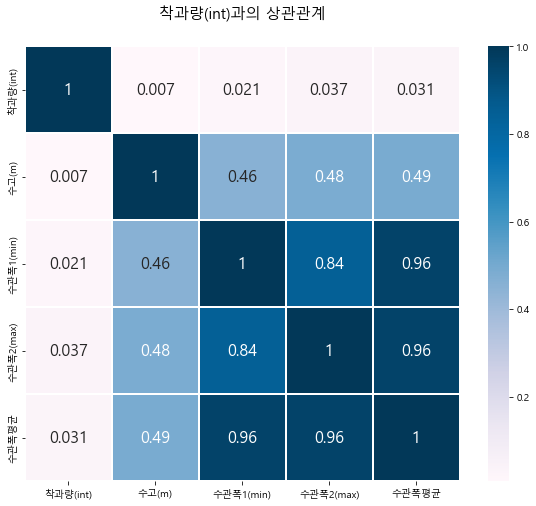

In [6]:
# 착과량과 수고,수관폭1,2,평균의 상관관계 확인
# 상관관계 히트맵
data = (train[['착과량(int)','수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균']])
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("착과량(int)과의 상관관계", y = 1.05, size = 15)
sns.heatmap(data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [7]:
# 수고, 수관폭 변수는 상관관계가 적기에 제거하기로 판단함
# train, validaton data set 만들기
X_train = train.drop(['ID','착과량(int)','수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균'], axis=1)
y_train = train['착과량(int)']
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=38)

In [9]:
# automl 모델 생성
automl = AutoML(mode = 'Compete', eval_metric='mae')
automl.fit(x_train, y_train)

AutoML directory: AutoML_2
The task is regression with evaluation metric mae
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree mae 30.135628 trained in 0.64 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle
* Step simple_algorithms will try to check up to 4 models
1_DecisionTree mae 31.920745 trained in 3.04 seconds
2_DecisionTree mae 30.988769 trained in 3.03 seconds
3_DecisionTree mae 30.988769 trained in 3.07 seconds
4_Linear m

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

38_RandomForest_KMeansFeatures mae 29.60587 trained in 21.43 seconds


MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

44_RandomForest_KMeansFeatures mae 29.74959 trained in 25.11 seconds


MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

47_ExtraTrees_KMeansFeatures mae 29.979696 trained in 19.07 seconds
* Step insert_random_feature will try to check up to 1 model


MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

38_RandomForest_KMeansFeatures_RandomFeature mae 29.685703 trained in 50.59 seconds
Drop features ['2022-09-12 새순', '2022-09-14 새순', 'Dist_Cluster_19', '2022-09-17 새순', 'Dist_Cluster_21', '2022-10-16 새순', '2022-09-28 새순', '2022-09-19 새순', 'Dist_Cluster_16', 'Dist_Cluster_10', 'Dist_Cluster_11', 'Dist_Cluster_14', '2022-11-28 새순', 'Dist_Cluster_22', '2022-09-26 새순', '2022-09-25 새순', 'Dist_Cluster_23', 'Dist_Cluster_4', '2022-11-27 새순', '2022-10-02 새순', '2022-09-29 새순', 'random_feature', '2022-11-21 새순', '2022-10-08 새순', 'Dist_Cluster_5', 'Dist_Cluster_0', '2022-09-23 새순', 'Dist_Cluster_18', '2022-10-24 새순', '2022-09-07 엽록소', '2022-10-15 새순', '2022-11-25 엽록소', '2022-10-05 새순', '2022-10-03 엽록소', 'Dist_Cluster_12', 'Dist_Cluster_8', '2022-09-21 새순', '2022-10-03 새순', '2022-10-06 새순', '2022-10-01 새순', '2022-11-13 새순', '2022-10-14 새순', '2022-11-03 엽록소', '2022-10-12 엽록소', '2022-10-23 새순', '2022-10-01 엽록소', '2022-10-09 새순', '2022-11-22 새순', '2022-10-07 새순', '2022-11-09 새순', 'Cluster', '2022-10-

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

38_RandomForest_KMeansFeatures_SelectedFeatures mae 29.67248 trained in 15.98 seconds
47_ExtraTrees_GoldenFeatures_SelectedFeatures mae 29.607966 trained in 12.74 seconds
16_Xgboost_SelectedFeatures mae 29.728235 trained in 9.63 seconds
28_LightGBM_SelectedFeatures mae 29.969832 trained in 10.79 seconds
34_CatBoost_SelectedFeatures mae 30.043107 trained in 11.73 seconds
62_NeuralNetwork_SelectedFeatures mae 34.519699 trained in 12.25 seconds
* Step hill_climbing_1 will try to check up to 20 models


MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

65_RandomForest mae 29.671139 trained in 26.25 seconds
66_ExtraTrees_GoldenFeatures_SelectedFeatures mae 29.568113 trained in 10.32 seconds
67_ExtraTrees_GoldenFeatures mae 29.652897 trained in 15.14 seconds


MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

68_RandomForest_SelectedFeatures mae 29.656782 trained in 21.71 seconds
69_Xgboost_SelectedFeatures mae 29.850449 trained in 18.22 seconds
70_Xgboost mae 30.084656 trained in 24.23 seconds
71_LightGBM_SelectedFeatures mae 29.960794 trained in 18.26 seconds
72_CatBoost_SelectedFeatures mae 30.073755 trained in 19.05 seconds
73_Xgboost mae 29.972734 trained in 24.63 seconds
74_Xgboost mae 30.090347 trained in 26.18 seconds
75_LightGBM mae 30.077443 trained in 19.61 seconds
76_LightGBM mae 30.122606 trained in 20.29 seconds
77_CatBoost mae 31.10204 trained in 36.22 seconds
78_CatBoost mae 31.249252 trained in 61.38 seconds
79_CatBoost mae 31.17772 trained in 125.77 seconds
80_DecisionTree mae 54.669137 trained in 23.81 seconds
81_NeuralNetwork_SelectedFeatures mae 34.820019 trained in 28.86 seconds
82_NeuralNetwork_SelectedFeatures mae 34.269019 trained in 25.25 seconds
83_NeuralNetwork mae 36.599507 trained in 29.43 seconds
84_NeuralNetwork mae 37.610962 trained in 35.03 seconds
* Step h

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

87_RandomForest_SelectedFeatures mae 29.598688 trained in 20.66 seconds
88_Xgboost_SelectedFeatures mae 29.680087 trained in 13.1 seconds
89_Xgboost_SelectedFeatures mae 29.714888 trained in 13.53 seconds
90_Xgboost_SelectedFeatures mae 29.760541 trained in 13.49 seconds
91_Xgboost_SelectedFeatures mae 29.768813 trained in 13.34 seconds
92_Xgboost mae 29.934327 trained in 17.3 seconds
93_Xgboost mae 29.887995 trained in 15.2 seconds
94_LightGBM_SelectedFeatures mae 29.960794 trained in 11.12 seconds
95_LightGBM_SelectedFeatures mae 29.969832 trained in 11.35 seconds
96_CatBoost_SelectedFeatures mae 30.318483 trained in 12.93 seconds
97_CatBoost_SelectedFeatures mae 29.906149 trained in 11.72 seconds
98_CatBoost_SelectedFeatures mae 30.206615 trained in 15.84 seconds
99_CatBoost_SelectedFeatures mae 30.111614 trained in 14.76 seconds
100_LightGBM mae 30.077443 trained in 16.34 seconds
101_CatBoost mae 30.890765 trained in 28.61 seconds
102_CatBoost mae 30.799063 trained in 22.1 seconds


MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

87_RandomForest_SelectedFeatures_Stacked mae 29.738708 trained in 29.18 seconds
88_Xgboost_SelectedFeatures_Stacked mae 30.411958 trained in 18.68 seconds
97_CatBoost_SelectedFeatures_Stacked mae 30.453431 trained in 23.47 seconds
94_LightGBM_SelectedFeatures_Stacked mae 30.555873 trained in 18.47 seconds
82_NeuralNetwork_SelectedFeatures_Stacked mae 127.022681 trained in 34.23 seconds
66_ExtraTrees_GoldenFeatures_SelectedFeatures_Stacked mae 29.869169 trained in 19.69 seconds


MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

38_RandomForest_KMeansFeatures_Stacked mae 29.6579 trained in 37.35 seconds
89_Xgboost_SelectedFeatures_Stacked mae 30.118147 trained in 24.38 seconds
34_CatBoost_SelectedFeatures_Stacked mae 30.333811 trained in 27.52 seconds
71_LightGBM_SelectedFeatures_Stacked mae 30.555873 trained in 22.29 seconds
62_NeuralNetwork_SelectedFeatures_Stacked mae 182.712756 trained in 36.27 seconds
47_ExtraTrees_GoldenFeatures_SelectedFeatures_Stacked mae 29.718199 trained in 19.34 seconds
38_RandomForest_Stacked mae 29.705834 trained in 32.98 seconds
16_Xgboost_SelectedFeatures_Stacked mae 30.029007 trained in 15.8 seconds
72_CatBoost_SelectedFeatures_Stacked mae 30.882823 trained in 26.03 seconds
28_LightGBM_SelectedFeatures_Stacked mae 30.539905 trained in 17.71 seconds
81_NeuralNetwork_SelectedFeatures_Stacked mae 170.157025 trained in 29.21 seconds
86_ExtraTrees_GoldenFeatures_Stacked mae 29.879774 trained in 67.64 seconds


MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

68_RandomForest_SelectedFeatures_Stacked mae 29.561811 trained in 57.79 seconds
* Step ensemble_stacked will try to check up to 1 model
Ensemble_Stacked mae 29.164236 trained in 39.29 seconds
AutoML fit time: 3666.29 seconds
AutoML best model: Ensemble_Stacked


AutoML(eval_metric='mae', mode='Compete')

In [10]:
pred = automl.predict(x_val)
pred

array([355.52388237, 650.07222655, 350.4424415 , 547.30101257,
       750.34642398, 366.96489256, 351.86605343, 556.72869429,
       745.36946303, 453.33263781, 144.21184375, 246.88369718,
       155.83937651,  41.51300887, 245.06468805, 653.95011961,
       450.52889956, 551.03324618,  28.27434657, 754.7684012 ,
       155.01626389, 347.279931  , 639.32284543, 637.38942685,
        40.11870502, 376.20448778, 654.33169325, 557.57073654,
       673.30823482, 450.2156328 , 451.85686143, 155.69480076,
        39.11868255, 249.67612651, 652.45062469,  40.16300763,
       591.99259356, 348.22806473, 646.3733278 , 458.82457246,
       457.0964311 , 748.839109  , 547.33348665, 249.96797625,
       451.82816621, 347.8510219 ,  33.13951961, 155.92109757,
       249.14930122, 355.95371261, 349.68171693, 536.50947925,
       395.83034955, 655.28999117, 205.83378543, 352.39212698,
       557.59733902, 451.26209283, 178.41819786, 251.10326294,
       364.09558761, 449.50200856, 540.23721135, 349.30

In [11]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score
NMAE(y_val, pred)

0.07500148018789361

In [14]:
# 생성된 모델을 test로 예측하기
pred = automl.predict(test.drop(['ID','수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균'], axis=1))
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['착과량(int)'] = pred
# 제출파일 생성
sample_submission.to_csv('./submit_automl.csv', index=False)

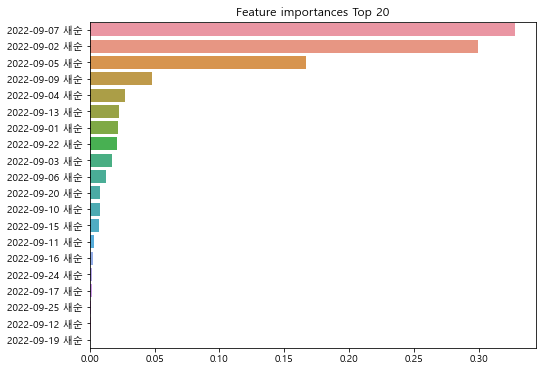

In [16]:
# 변수중요도 TOP20
importances_values = model.feature_importances_
importances = pd.Series(importances_values, index = x_train.columns)
top20 = importances.sort_values(ascending = False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [1]:
x = 0
while x < 10:
    x = x + 1
    if x <= 5:
        continue
    if x > 8:
        break
    
    print(x)

6
7
8


In [2]:
num1 = [1,2,3,4]
num2 = [6,7,8,9]
num1.append(num2)

len(num1)

5

In [3]:
num1

[1, 2, 3, 4, [6, 7, 8, 9]]